<a href="https://colab.research.google.com/github/Jlokkerbol/practice_datasets/blob/main/Credit_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages('psych')
install.packages('tidyverse')
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages('Metrics')
install.packages('e1071')
install.packages('glmnet')

library(psych)          # alternative package to describe your data
library(tidyverse)      # easy way to subset your data
library(corrplot)       # to draw correlation plots
library(ggplot2)        # to plot graphs
library(caret)          # to run machine learning models
library(Metrics)        # to calculate RMSE
library(e1071)          # for statistical analyses
library(glmnet)         # for statistical analyses

options(scipen=999) # turn off scientific notation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’


── Attaching packages ───────────────────

In [6]:

df = read.csv('https://raw.githubusercontent.com/Jlokkerbol/practice_datasets/main/creditcard.csv')[1:20000,]


This dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA (principal component analysis) transformation. 
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. 
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
Link to dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In this notebook we work with a subset of this data, using the first 20,000 observations.

## Exercise 1: Familiarize yourself with the data.
Provide a table with descriptive statistics for all included variables and check:

-Classes of each of the variables (e.g. factors or continuous variables).

-Change the class of the "Class" variable such that it is a binary factor

-Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).  

-Explore missing values: sapply(df, function(x) sum(is.na(x)))  

HINT: Use the base-R function "str" (no package needed)
Use the "describe" function (from the psych"-package) for continuous variables and the "table" function (base-R) for factor variables.

In [7]:
# To check the structure of the data, you can use the "str"-command:
str(df)

'data.frame':	20000 obs. of  31 variables:
 $ Time  : int  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V1

In [8]:
#To create a binary factor (as Class has only two levels)
df$Class <- as.factor(df$Class) ## We need to tell R that our outcome is a binary factor
table(df$Class)


    0     1 
19915    85 

In [9]:
#Explore missing values: 
sapply(df, function(x) sum(is.na(x))) 

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

In [10]:
# To describe numeric and integer variables
df %>%
  keep(is.numeric) %>% 
  describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Time,1,20000,15569.833650000,10540.8349279,15012.50000000,15625.3258750000,16157.37480000,0.000000,30717.000000,30717.000000,-0.03091137,-1.53910777,74.534958569
V1,2,20000,-0.245246371,1.8914431,-0.30252069,0.0210279721,1.94219525,-30.552380,1.960497,32.512877,-4.45174299,43.66193674,0.013374523
V2,3,20000,0.240540131,1.5300655,0.21904194,0.2455351338,0.88450074,-40.978852,16.713389,57.692241,-2.31742985,71.99608352,0.010819197
V3,4,20000,0.745641746,1.7679167,0.89867176,0.9086564641,0.90137224,-31.103685,4.101716,35.205401,-7.07084394,86.43009141,0.012501059
V4,5,20000,0.277184456,1.4651851,0.22505086,0.2352806144,1.32306160,-5.172595,11.927512,17.100106,0.66352493,3.34909350,0.010360424
V5,6,20000,-0.163955746,1.4306489,-0.20068872,-0.1868956727,0.80557455,-32.092129,34.099309,66.191438,-1.64912838,76.81624919,0.010116215
V6,7,20000,0.092962417,1.3320718,-0.17529328,-0.0748147523,0.80676213,-23.496714,21.393069,44.889783,0.83806656,15.52565431,0.009419170
V7,8,20000,-0.145576842,1.3369816,-0.07246000,-0.0813042337,0.77837576,-26.548144,34.303177,60.851321,-4.47169452,96.13918245,0.009453888
V8,9,20000,0.022047506,1.3475613,0.02399190,0.0572033366,0.32333996,-41.484823,20.007208,61.492031,-4.37924610,142.15495274,0.009528697


## Exercise 2: 
The variable "Class" refers to the presence of fraud and hence is the variable of interest for our prediction model ("Y" or dependent variable). 

The frequency of the outcomes (fraud yes/no) was already determined in the previous code blocks. Please further explore Y in terms of:

-Describe X-variables separately for both outcome categories (using describeBy(df, group = df$Class)

-Draw a correlation plot to see all correlations between Y and the independent (numeric) variables (see HINT 2 below)

-Visualize the relation between Y and a few correlated X-variables (i.e. create boxplot or scatterplot using the "ggplot2"-package)


### HINT 1: For visualisation, ggplot is frequently used as it provides a flexible way to draw a lot of different graphs.
Ggplot contains two basic elements: 

1.The initiation command: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=XVAR)). This draws a blank ggplot. Even though the x and y are specified, there are no points or lines in it.

2.Add the respective geom of interest (for this exercise you'll need "+geom_boxplot()")

The full code to write a boxplot would then be: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=YVAR)) + geom_boxplot()

### HINT 2: 
To draw a correlation plot. Please use the "corrplot"-package. Using this package, one van construct a correlation plot in two steps:

1.Use "cor" to calculate correlation between all combinations of numeric variables (note: there are only numeric variables in the dataset)

2.Plot the calculated correlation by using the "corrplot"-function
Note that Class must be transformed back into a numeric variable for this exercise

In [11]:
# Describe X-variables separately for both outcome categories:
describeBy(df, group=df$Class)


 Descriptive statistics by group 
group: 0
       vars     n     mean       sd   median  trimmed      mad    min      max
Time      1 19915 15561.87 10548.18 15001.00 15615.32 16182.58   0.00 30717.00
V1        2 19915    -0.21     1.69    -0.30     0.03     1.94 -28.34     1.96
V2        3 19915     0.21     1.44     0.21     0.24     0.88 -40.98    14.85
V3        4 19915     0.80     1.40     0.90     0.92     0.90 -27.75     4.10
V4        5 19915     0.25     1.40     0.22     0.23     1.32  -5.17    10.46
V5        6 19915    -0.14     1.29    -0.20    -0.18     0.80 -32.09    34.10
V6        7 19915     0.10     1.32    -0.17    -0.07     0.81 -23.50    21.39
V7        8 19915    -0.11     1.12    -0.07    -0.08     0.78 -26.55    34.30
V8        9 19915     0.00     1.25     0.02     0.06     0.32 -41.48    17.57
V9       10 19915     0.65     1.25     0.62     0.61     1.20  -4.53    10.39
V10      11 19915    -0.19     1.10    -0.27    -0.24     0.66 -11.21    12.70
V11     

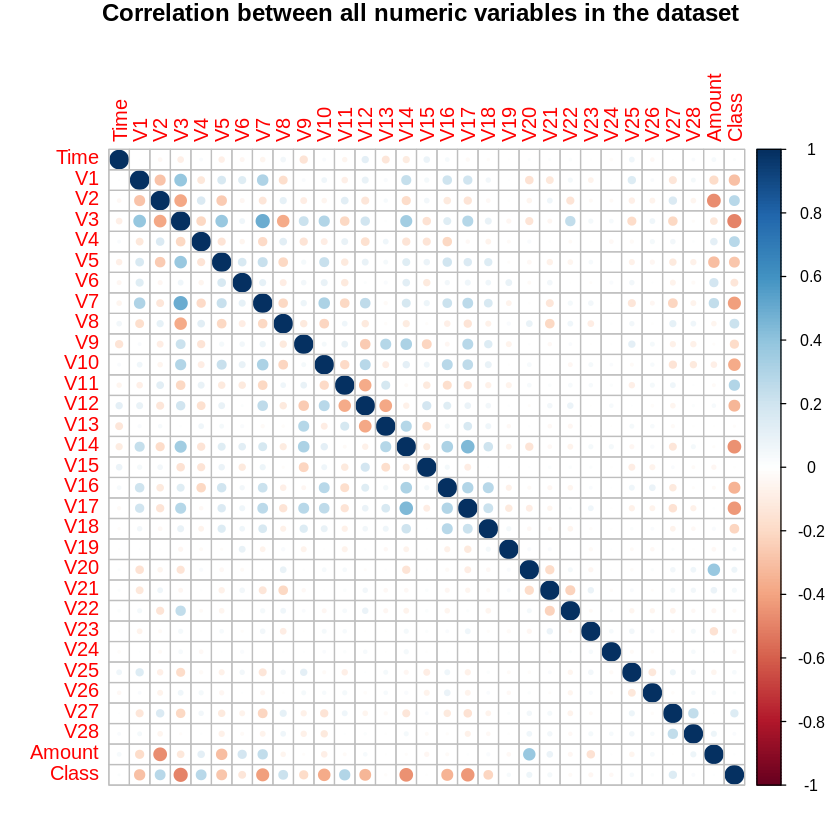

In [12]:
# Correlation plot 
df$Class = as.numeric(df$Class)
corr_df <- df %>% 
  keep(is.numeric) %>% 
  cor

corrplot(corr_df, number.font=12, tl.cex = 1.00, title="Correlation between all numeric variables in the dataset", mar=c(0,0,1,0))
df$Class = as.factor(df$Class)

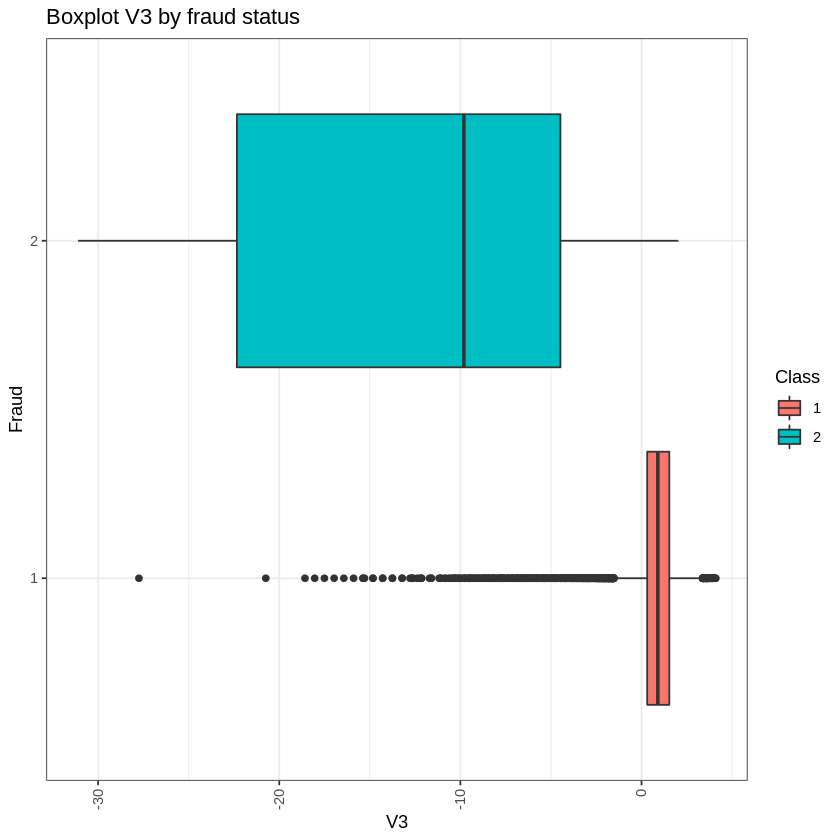

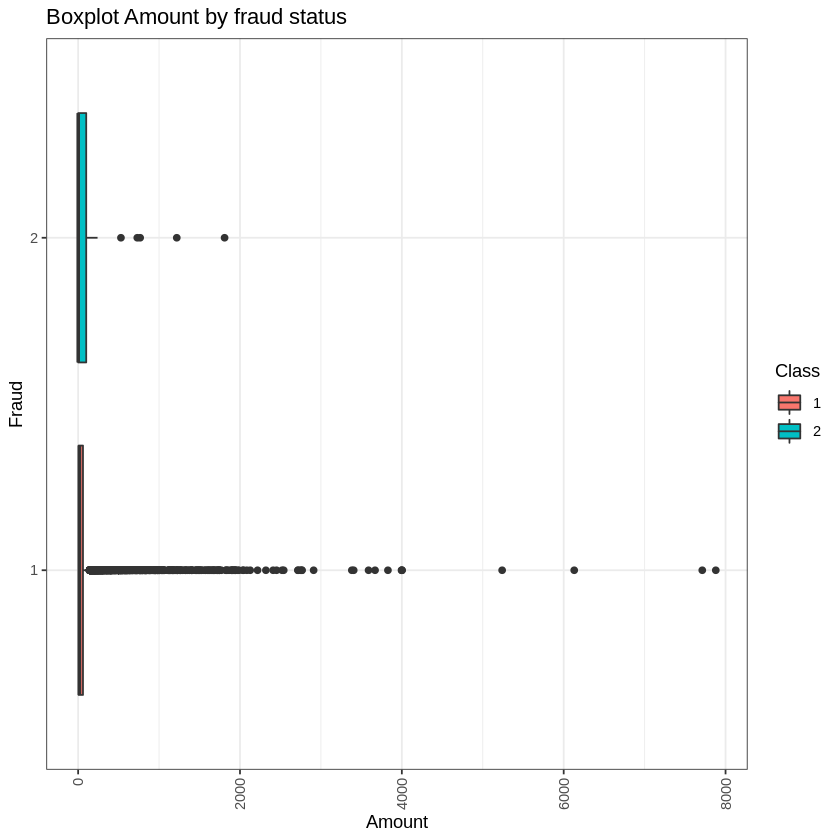

In [13]:
# Construct boxplot
ggplot(df, aes(x=V3, y=Class, group=Class)) + 
  geom_boxplot(aes(fill=Class)) +
  labs(title="Boxplot V3 by fraud status")+
  ylab(label="Fraud") + 
  xlab("V3")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggplot(df, aes(x=Amount, y=Class, group=Class)) + 
  geom_boxplot(aes(fill=Class)) +
  labs(title="Boxplot Amount by fraud status")+
  ylab(label="Fraud") + 
  xlab("Amount")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


## Exercise 3 
Now that we have a feeling of the information in the dataset and we know that there are no missing values, we can start by running some simple machine learning models.
We will use the "caret"-package for this exercise. 
For this we'll need to split the data in a train and a test set. 
Use the following code to create a train and test dataset:

In [14]:
set.seed (123456789)
dt = sort(sample(nrow(df), nrow(df)*.7)) ## 70% in train set
train<-df[dt,]
test<-df[-dt,]

Do you understand why we are splitting the data? 
Do you understand what has been done in the code above?

Next we need to specify how we want to perform the cross-validation (i.e. the optimization of the model on the train set). To this extend we need to set the method of CV, the number of folds and the numer of times we want to repeat the process.
This can be done using the following command:

In [15]:
# Cross-validation strategy
ctrl <- trainControl(method = "repeatedcv",
                     number = 5,    # ten folds
                     repeats = 3)   # repeated three times

## Exercise 3.1
Once this has been set, we are ready to run the models on the train set. 
Use the syntax below to estimate a linear model, LASSO model and a kNN model on the train set:
Please inspect the outcomes of the model. Which model performs best? 

In [16]:
## Run LM
lm <- train(Class ~ ., method = "glm", 
            data = train, 
            trControl = ctrl, 
            preProcess = c("center"))
            
lm # to obtain summary of the model
varImp(lm) # to see most important parameters

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

14000 samples
   30 predictor
    2 classes: '1', '2' 

Pre-processing: centered (30) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 11200, 11199, 11201, 11201, 11199, 11201, ... 
Resampling results:

  Accuracy   Kappa    
  0.9983333  0.8168375


glm variable importance

  only 20 most important variables shown (out of 30)

       Overall
V27    100.000
Time    63.207
Amount  45.406
V24     26.371
V3      22.481
V28     20.484
V26     19.799
V6      13.662
V25     13.272
V23     11.454
V8      10.539
V20      8.008
V14      5.996
V5       4.785
V4       4.741
V21      3.719
V7       3.557
V10      3.157
V22      2.592
V13      2.321

k-Nearest Neighbors 

14000 samples
   30 predictor
    2 classes: '1', '2' 

Pre-processing: centered (30), scaled (30) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 11199, 11201, 11200, 11200, 11200, 11201, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9986666  0.8284238
  7  0.9984285  0.7995988
  9  0.9981190  0.7678828

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

ROC curve variable importance

  only 20 most important variables shown (out of 30)

    Importance
V14     100.00
V4       99.09
V3       96.49
V12      94.04
V10      93.34
V11      92.68
V2       90.61
V9       87.70
V6       87.37
V16      78.71
V7       78.61
V27      70.75
V17      68.16
V20      66.74
V1       63.63
V8       52.61
V18      51.42
V5       49.36
V28      47.74
V21      44.96

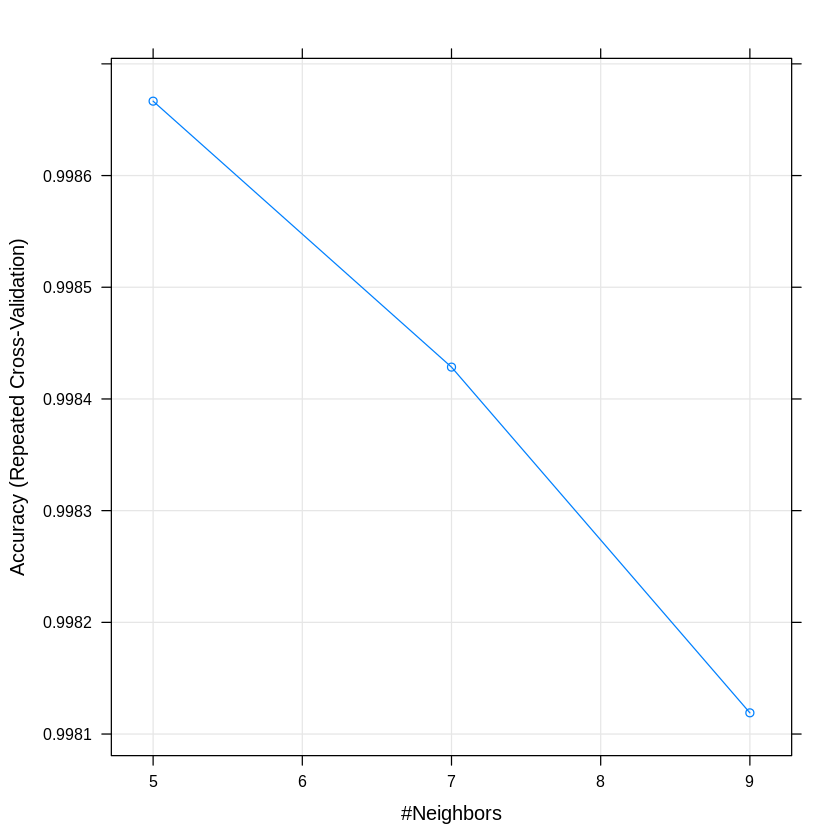

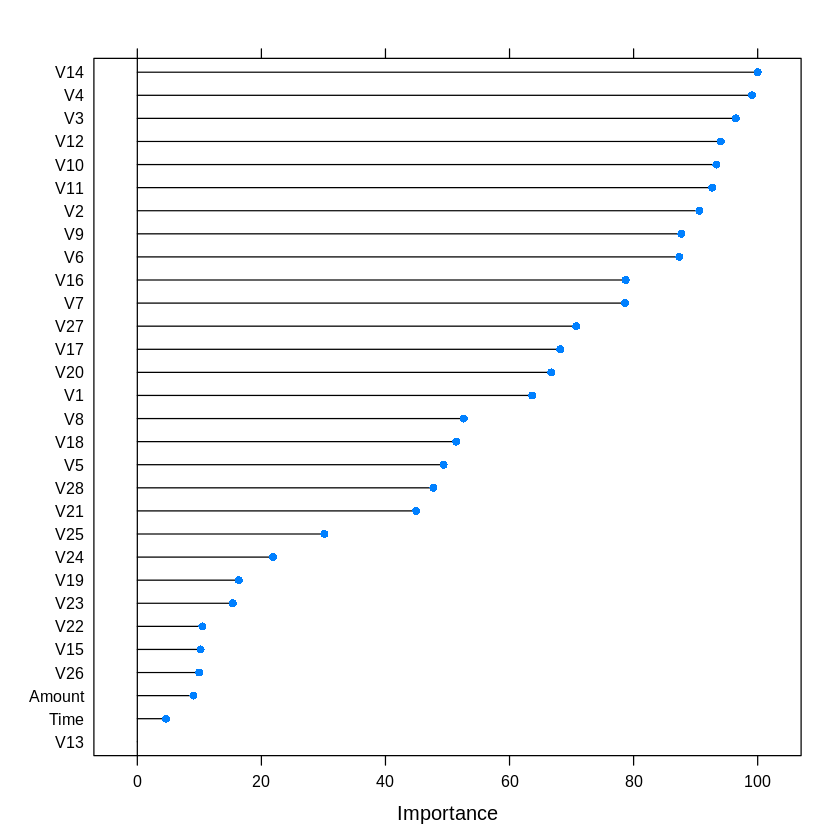

In [17]:
## Run kNN
knnFit <- train(Class ~ ., 
                data = train, 
                method = "knn", 
                trControl = ctrl, 
                preProcess = c("center","scale"))

knnFit  # to obtain summary of the model
plot(knnFit)
varImp(knnFit) # to see most important parameters
plot(varImp(knnFit)) # to plot most important parameters

glmnet 

14000 samples
   30 predictor
    2 classes: '1', '2' 

Pre-processing: centered (30), scaled (30) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 11201, 11200, 11199, 11200, 11200, 11201, ... 
Resampling results across tuning parameters:

  lambda          Accuracy   Kappa      
     0.001000000  0.9978810  0.748416840
     0.001149757  0.9978810  0.746487832
     0.001321941  0.9978334  0.738944802
     0.001519911  0.9977858  0.731147422
     0.001747528  0.9976905  0.719016709
     0.002009233  0.9975477  0.695037781
     0.002310130  0.9975000  0.686231406
     0.002656088  0.9974286  0.675879707
     0.003053856  0.9974048  0.672869088
     0.003511192  0.9973810  0.668531100
     0.004037017  0.9973572  0.658544175
     0.004641589  0.9973572  0.658544175
     0.005336699  0.9973572  0.658544175
     0.006135907  0.9972858  0.648494333
     0.007054802  0.9973096  0.650255749
     0.008111308  0.9973334  0.650858441
     0.009326033  0.

glmnet variable importance

  only 20 most important variables shown (out of 30)

    Overall
V4  100.000
V14  99.831
V3   41.896
V27  24.070
V19  19.314
V17   4.233
V23   0.000
V8    0.000
V9    0.000
V12   0.000
V18   0.000
V2    0.000
V28   0.000
V13   0.000
V24   0.000
V22   0.000
V20   0.000
V16   0.000
V11   0.000
V7    0.000

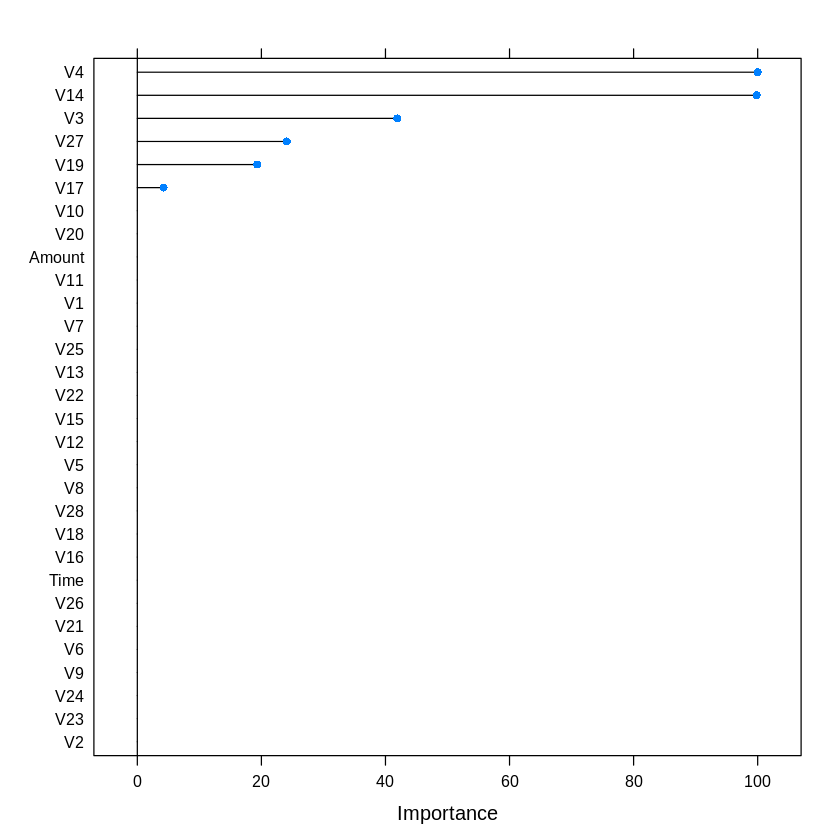

In [18]:
## Run LASSO
lambda <- 10^seq(-3,3,length=100)

lassoFit <- train(Class ~ ., 
                  data = train, 
                  method = "glmnet", 
                  trControl = ctrl, 
                  family = "binomial",
                  preProcess = c("center","scale"),
                  tuneGrid = expand.grid(alpha = 1, lambda = lambda))

lassoFit # to obtain summary of the model
varImp(lassoFit) # to see most important parameters
plot(varImp(lassoFit)) # to plot most important parameters

## Exercise 3.4
Now all we have to do is to check the performance of our best performing model on the test dataset. 
Please use the  code below to check this performance.
Which model is best?
Why should you never test all your models straight away on the test dataset, but instead use your training data set first?

In [19]:
## Check performance on test set
# For LM:
print("LM performance")
pred_lm <- predict(lm, newdata = test)
confusionMatrix(pred_lm, test$Class)

# For KNN
print("KNN performance")
pred_knn <- predict(knnFit, newdata = test)
confusionMatrix(pred_knn, test$Class)

# For LASSO
print("LASSO performance")
pred_lasso <- predict(lassoFit, newdata = test)
confusionMatrix(pred_lasso, test$Class)


[1] "LM performance"


Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1 5974    8
         2    3   15
                                          
               Accuracy : 0.9982          
                 95% CI : (0.9967, 0.9991)
    No Information Rate : 0.9962          
    P-Value [Acc > NIR] : 0.004371        
                                          
                  Kappa : 0.7308          
                                          
 Mcnemar's Test P-Value : 0.227800        
                                          
            Sensitivity : 0.9995          
            Specificity : 0.6522          
         Pos Pred Value : 0.9987          
         Neg Pred Value : 0.8333          
             Prevalence : 0.9962          
         Detection Rate : 0.9957          
   Detection Prevalence : 0.9970          
      Balanced Accuracy : 0.8258          
                                          
       'Positive' Class : 1               
                        

[1] "KNN performance"


Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1 5976    9
         2    1   14
                                          
               Accuracy : 0.9983          
                 95% CI : (0.9969, 0.9992)
    No Information Rate : 0.9962          
    P-Value [Acc > NIR] : 0.001948        
                                          
                  Kappa : 0.736           
                                          
 Mcnemar's Test P-Value : 0.026857        
                                          
            Sensitivity : 0.9998          
            Specificity : 0.6087          
         Pos Pred Value : 0.9985          
         Neg Pred Value : 0.9333          
             Prevalence : 0.9962          
         Detection Rate : 0.9960          
   Detection Prevalence : 0.9975          
      Balanced Accuracy : 0.8043          
                                          
       'Positive' Class : 1               
                        

[1] "LASSO performance"


Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1 5966   13
         2   11   10
                                          
               Accuracy : 0.996           
                 95% CI : (0.9941, 0.9974)
    No Information Rate : 0.9962          
    P-Value [Acc > NIR] : 0.6347          
                                          
                  Kappa : 0.4525          
                                          
 Mcnemar's Test P-Value : 0.8383          
                                          
            Sensitivity : 0.9982          
            Specificity : 0.4348          
         Pos Pred Value : 0.9978          
         Neg Pred Value : 0.4762          
             Prevalence : 0.9962          
         Detection Rate : 0.9943          
   Detection Prevalence : 0.9965          
      Balanced Accuracy : 0.7165          
                                          
       'Positive' Class : 1               
                        